# Symbolic analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [2]:
init_printing()

In [4]:
x, y, x1, y1, x2, y2, xp, yp, xm, ym, ϵ1, ϵ2, k, a, b, c, s = symbols('x, y, x_1, y_1, x_2, y_2, x_+, y_+, x_-, y_-, ϵ_1, ϵ_2, k, a, b, c, s') 

In [12]:
f = (x - x**3/3 - c*y - a)/(ϵ1*ϵ2)
g = (x - c*y)/ϵ1
z = (f,g)
z

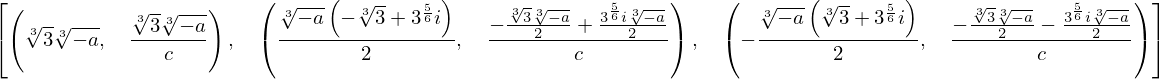

In [13]:
solve(z,(x,y))

In [27]:
f1 = f.subs([(x, x1), (y,y1)]) + k*(x2-x1)
f2 = f.subs([(x, x2), (y,y2)]) + k*(x1-x2)
g1 = g.subs([(x, x1), (y,y1)])
g2 = g.subs([(x, x2), (y,y2)])

(f1, g1, f2, g2)

In [28]:
zp = simplify((f1+f2, g1+g2))
zm = simplify((f1-f2, g1-g2))
(zp, zm)

In [43]:
zzp = (simplify(zp[0].subs([(x1,(xp+xm)/2), (x2,(xp-xm)/2), (y1,(yp+ym)/2), (y2,(yp-ym)/2)])),
     simplify(zp[1].subs([(x1,(xp+xm)/2), (x2,(xp-xm)/2), (y1,(yp+ym)/2), (y2,(yp-ym)/2)])))
zzm = (simplify(zm[0].subs([(x1,(xp+xm)/2), (x2,(xp-xm)/2), (y1,(yp+ym)/2), (y2,(yp-ym)/2)])),
     simplify(zm[1].subs([(x1,(xp+xm)/2), (x2,(xp-xm)/2), (y1,(yp+ym)/2), (y2,(yp-ym)/2)])))

In [49]:
zz = (zzp, zzm)

In [50]:
M = Matrix([
    [diff(zzp[0],xp), diff(zzp[1],xp), diff(zzm[0],xp), diff(zzm[1],xp)],
    [diff(zzp[0],yp), diff(zzp[1],yp), diff(zzm[0],yp), diff(zzm[1],yp)],
    [diff(zzp[0],xm), diff(zzp[1],xm), diff(zzm[0],xm), diff(zzm[1],xm)],
    [diff(zzp[0],ym), diff(zzp[1],ym), diff(zzm[0],ym), diff(zzm[1],ym)],
    
])

In [51]:
M

⎡    2     2                                          ⎤
⎢  x₊    x₋                                           ⎥
⎢- ─── - ─── + 1                                      ⎥
⎢   4     4       1             -x₊⋅x₋                ⎥
⎢───────────────  ──            ───────             0 ⎥
⎢     ϵ₁⋅ϵ₂       ϵ₁            2⋅ϵ₁⋅ϵ₂               ⎥
⎢                                                     ⎥
⎢      -c         -c                                  ⎥
⎢     ─────       ───              0                0 ⎥
⎢     ϵ₁⋅ϵ₂        ϵ₁                                 ⎥
⎢                                                     ⎥
⎢                                     2     2         ⎥
⎢                                   x₊    x₋          ⎥
⎢                      -2⋅k⋅ϵ₁⋅ϵ₂ - ─── - ─── + 1     ⎥
⎢    -x₊⋅x₋                          4     4       1  ⎥
⎢    ───────       0   ──────────────────────────  ── ⎥
⎢    2⋅ϵ₁⋅ϵ₂                     ϵ₁⋅ϵ₂             ϵ₁ ⎥
⎢                                               

In [56]:
zz

In [65]:
ss = solve(z,(x,y))

In [67]:
zz

In [71]:
zz_flat = (zz[0][0], zz[0][1], zz[1][0], zz[1][1])

In [73]:
solve(zz_flat, (xp,yp,xm,ym))

KeyboardInterrupt: 